In [14]:
import numpy as np
import sim_probCCA as sc
import canon_corr as cca
import prob_cca as pcca
import scipy.linalg as slin
import matplotlib.pyplot as plt

xDim,yDim,zDim = 30,30,5

# simulate from pCCA model
pcca_sim = sc.sim_probCCA(xDim,yDim,zDim,rand_seed=0)
X,Y = pcca_sim.sim_data(10000,rand_seed=0)
sim_model = pcca.prob_cca()
sim_model.set_params(pcca_sim.get_params())


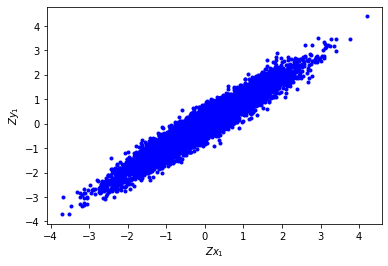

In [2]:
# vanilla CCA
cca_model = cca.canon_corr()
cca_model.train(X,Y,zDim)
Zx,Zy = cca_model.proj_data(X,Y)

plt.figure(0)
plt.plot(Zx[:,0],Zy[:,0],'b.')
plt.xlabel('$Zx_{1}$')
plt.ylabel('$Zy_{1}$')
plt.show()


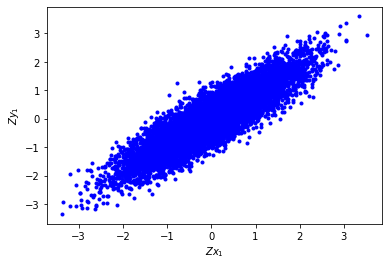

In [10]:
# pCCA
pcca_model = pcca.prob_cca()
pcca_model.train(X,Y,zDim,warmstart=False,tol=1e-9,rand_seed=5)
# pcca_model.train_maxLL(X,Y,zDim)
z_pcca,curr_LL = pcca_model.estep(X,Y)
# z_orth,Worth = pcca_model.orthogonalize(z_pcca['zx_mu'],z_pcca['zy_mu'])
Z_x = z_pcca['zx_mu']
Z_y = z_pcca['zy_mu']

plt.figure(1)
plt.plot(Z_x[:,0],Z_y[:,0],'b.')
plt.xlabel('$Zx_{1}$')
plt.ylabel('$Zy_{1}$')
plt.show()


In [ ]:
# crossvalidate pCCA
pcca_model = pcca.prob_cca()
LLs,zDim_list,max_LL,zDim = pcca_model.crossvalidate(X,Y)

plt.figure(2)
plt.plot(zDim_list,LLs,'bo-')
plt.plot(zDim,max_LL,'r^')
plt.show()


In [ ]:
cv_rho = pcca_model.get_params()['cv_rho']
train_rho = pcca_model.get_params()['rho']
true_rho = sim_model.get_params()['rho']

plt.figure(3)
plt.plot(train_rho,'bo-')
plt.plot(cv_rho,'ro-')
plt.plot(true_rho,'ko-')
plt.legend(('train','cv','ground truth'))
plt.show()

In [ ]:
# compute metrics
fit_metrics = pcca_model.compute_metrics()
gt_metrics = sim_model.compute_metrics()


In [23]:
cca_model.params['W_x'][:,0]

array([-0.02650165,  0.14698921,  0.17982064,  0.04727118,  0.01038789,
        0.02885229,  0.17959775,  0.07176345, -0.04593073,  0.19159137,
       -0.13495751, -0.16148012,  0.01365905, -0.01973739,  0.01854154,
        0.3374869 , -0.0056761 , -0.0603385 , -0.21161969, -0.07871103,
        0.03951311,  0.25841233, -0.11548044,  0.01065037,  0.25108261,
       -0.14065322,  0.26609066, -0.04658036, -0.16473151,  0.07444151])

In [15]:
u,d,v = slin.svd(Z_x.T.dot(Z_x))

In [ ]:
pcca_model.get_params()['rho']

In [31]:
pcca_model.params['W_x'].dot(u)[:,0]

array([ 1.12754646,  1.41037503, -0.08668795,  0.98234348, -0.20874364,
       -0.42807258, -1.35694131, -0.68834028,  1.1416823 ,  0.4198408 ,
       -1.10163904, -0.75642817,  0.30568676, -0.36262383, -0.43785245,
       -0.79295454, -0.26706015,  0.69579327, -1.12583285, -0.31355654,
       -2.25555212,  1.16111574, -0.4565829 ,  1.04518444,  2.28478025,
        1.51072794,  0.21043712, -1.41284665, -0.28539763,  0.15251874])

In [26]:
Z_x.T.dot(Z_x)

array([[8892.35581168,  567.92134448,  -82.47080937,  203.73487718,
         260.94462312],
       [ 567.92134448, 8613.13397326,  -83.71086903,  271.19276886,
        -479.98701044],
       [ -82.47080937,  -83.71086903, 8751.74566091,  247.50152058,
         376.83963316],
       [ 203.73487718,  271.19276886,  247.50152058, 9021.57091292,
         -82.53258823],
       [ 260.94462312, -479.98701044,  376.83963316,  -82.53258823,
        8697.55245973]])

In [30]:
u.dot(u.T)

array([[ 1.00000000e+00,  2.54494868e-16,  1.79005547e-16,
         4.55680366e-16, -1.39352927e-16],
       [ 2.54494868e-16,  1.00000000e+00, -1.42347428e-16,
         5.27514050e-16,  1.62264163e-17],
       [ 1.79005547e-16, -1.42347428e-16,  1.00000000e+00,
        -2.61116537e-16,  4.03668723e-16],
       [ 4.55680366e-16,  5.27514050e-16, -2.61116537e-16,
         1.00000000e+00,  1.73537601e-16],
       [-1.39352927e-16,  1.62264163e-17,  4.03668723e-16,
         1.73537601e-16,  1.00000000e+00]])

In [37]:
W_x, W_y = pcca_model.params['W_x'], pcca_model.params['W_y']
psi_x, psi_y = pcca_model.params['psi_x'], pcca_model.params['psi_y']

# compute canonical correlations
est_covX = W_x.dot(W_x.T) + psi_x
est_covY = W_y.dot(W_y.T) + psi_y
est_covXY = W_x.dot(W_y.T)
inv_sqrt_covX = slin.inv(slin.sqrtm(est_covX))
inv_sqrt_covY = slin.inv(slin.sqrtm(est_covY))
K = inv_sqrt_covX.dot(est_covXY).dot(inv_sqrt_covY)
u2,d,v2 = slin.svd(K,econ=True)
rho = d[0:zDim]

TypeError: svd() got an unexpected keyword argument 'econ'

In [42]:
u2[:,0:zDim]

array([[-0.03954207, -0.19361147, -0.12773136, -0.04464233,  0.12689837],
       [-0.27137747,  0.00730359,  0.267355  ,  0.00084851, -0.07984086],
       [ 0.00076803, -0.23621718,  0.02697371,  0.08638263, -0.25997887],
       [-0.08428108,  0.08143293,  0.15384502, -0.01616102,  0.06353019],
       [-0.00896516, -0.15779725, -0.14815664, -0.09367382, -0.18239014],
       [ 0.09508296, -0.06801459, -0.32870322,  0.37000574, -0.24151955],
       [ 0.12874432,  0.16058769, -0.20283053,  0.04550135,  0.02694952],
       [ 0.01161762, -0.08054961,  0.06082228,  0.15704163, -0.31625294],
       [-0.21467937,  0.32370143, -0.06872461,  0.27013506,  0.25725154],
       [-0.13849676,  0.35411661, -0.38610847,  0.25031539, -0.21169957],
       [ 0.23312139,  0.19322579, -0.03519671,  0.17301971,  0.10996054],
       [ 0.23345885,  0.25530374, -0.16101164, -0.13066887, -0.1246595 ],
       [ 0.02471731,  0.27666443,  0.25442477, -0.17890339,  0.12200553],
       [ 0.1128887 ,  0.06721281,  0.1